In [1]:
%matplotlib ipympl 
import numpy as np
import matplotlib.pyplot as plt
import time
import sympy as sym
from math import e
import matplotlib.animation as animation
from tqdm import tqdm

## Ejercicio 11

In [2]:
x0=np.array([1,1,1])

A=np.array([[1,2,-1],
            [1,0,1],
            [4,-4,5]])

In [3]:
def vector_sim(x0, A, k):
    x_n = x0
    for i in range(k-1):
        x_n = np.dot(A, x_n/np.linalg.norm(x_n))
    x_n1 = np.dot(A, x_n)
    
    resp = np.dot(x_n.T, x_n1) / np.dot(x_n.T, x_n )
    
    print("Valor propio: ", np.abs(resp))
    
    print("Vector propio: ", x_n1)
        

In [4]:
vector_sim(x0, np.linalg.inv(A), 60)

Valor propio:  1.0
Vector propio:  [-0.40824829  0.40824829  0.81649658]


## Ejercicio 16

In [5]:
i=sym.I

In [6]:
y0 = np.array([[1,0,0,0],
                [0,1,0,0],
                [0,0,-1,0],
                [0,0,0,-1]])

y1 = np.array([[0,0,0,1],
              [0,0,1,0],
              [0,-1,0,0],
              [-1,0,0,0]])

y2 = np.array([[0,0,0,-i],
              [0,0,i,0],
              [0,i,0,0],
              [-i,0,0,0]])

y3 = np.array([[0,0,1,0],
              [0,0,0,-1],
              [-1,0,0,0],
              [0,1,0,0]])

Métricas de Minkowski

In [7]:
n00 = np.array([[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]])

nii = np.array([[-1,0,0,0],
                [0,-1,0,0],
                [0,0,-1,0],
                [0,0,0,-1]])

nij = np.array([[0,0,0,0],
                [0,0,0,0],
                [0,0,0,0],
                [0,0,0,0]])

I = np.array([[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]])

In [8]:
def anticonm(A,B):
    return np.dot(A,B) +np.dot(B,A)

Para $\mu = v = 0$
$$\eta^{00}$$

In [9]:
sym.Matrix(anticonm(y0,y0)) 


Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

In [10]:
sym.Matrix(2*np.dot(n00,I))

Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

Para $\mu \neq v$
$$\eta^{ij}$$

En general para $ij$, $\eta^{ij}=0$, por tanto la relación de anticonmutación para $\{\gamma^i, \gamma^j\}=0_4$, donde $0_4$ es una matriz 4x4 llena de ceros. Esto también sucede para $\eta^{0i}=0$

In [11]:
sym.Matrix(anticonm(y0,y1)), sym.Matrix(anticonm(y0,y2)), sym.Matrix(anticonm(y0,y3))

(Matrix([
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]),
 Matrix([
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]),
 Matrix([
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]))

In [12]:
sym.Matrix(anticonm(y1,y2)), sym.Matrix(anticonm(y1,y3)), sym.Matrix(anticonm(y2,y3))

(Matrix([
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]),
 Matrix([
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]),
 Matrix([
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]))

Tenemos que la matriz $2\eta^{ij}I_{4x4}$ es :

In [13]:
sym.Matrix(2*np.dot(nij,I))

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Por tanto se cumple la relación.

Finalmente para $\mu = v$
$$\eta^{ii}$$

In [14]:
sym.Matrix(anticonm(y1,y1)), sym.Matrix(anticonm(y2,y2)), sym.Matrix(anticonm(y3,y3))

(Matrix([
 [-2,  0,  0,  0],
 [ 0, -2,  0,  0],
 [ 0,  0, -2,  0],
 [ 0,  0,  0, -2]]),
 Matrix([
 [-2,  0,  0,  0],
 [ 0, -2,  0,  0],
 [ 0,  0, -2,  0],
 [ 0,  0,  0, -2]]),
 Matrix([
 [-2,  0,  0,  0],
 [ 0, -2,  0,  0],
 [ 0,  0, -2,  0],
 [ 0,  0,  0, -2]]))

En este caso tenemos que la matriz $2\eta^{ii}I_{4x4}$ es :

In [15]:
sym.Matrix(2*np.dot(nii,I))

Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Probadas todas las expresiones podemos afirmar que el álgebra de Clifford está dada por una relación de anticonmutación.

## Ejercicio 17

In [16]:
x=sym.Symbol("x", real=True)
y=sym.Symbol("y", real=True)
z=x+i*y

In [17]:
def f(x):
    return x**3 -1

In [18]:
num=f(z)

In [19]:
F=np.array([sym.re(num), sym.im(num)])

In [20]:
sym.diff(F[0],x)

3*x**2 - 3*y**2

In [21]:
def GetJacobian(fn):
    
    J=sym.Matrix([[ sym.diff(fn[0], x), sym.diff(fn[0], y)],
               [sym.diff(fn[1], x), sym.diff(fn[1], y)]]) 
    
    return J

In [22]:
Jacb_sym = GetJacobian(F)

In [23]:
Jacb_sym

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [24]:
Jac_np = sym.lambdify([x,y],Jacb_sym,"numpy")

In [25]:
F_np = sym.lambdify([x,y], sym.Matrix(F),"numpy")

In [26]:
def raices(fn, z0, J, itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    dvector = []
    cont=0
    while d > error and it < itmax:
        # Vector actual
        zc = z0
        F = fn(zc[0],zc[1]).T[0]
        Jac = J(zc[0], zc[1])   
        InvJ = np.linalg.inv(Jac)
        
        z0 = zc - np.dot(InvJ , F)
        
        diff = z0 - zc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        
        it += 1
    
    #print(it)
    return z0

In [27]:
N=50
x = list(np.linspace(-1,1,N))
y = list(np.linspace(-1,1,N))
#x = list(np.random.uniform(-1,1,N))
#y = list(np.random.uniform(-1,1,N))
Fractal = np.zeros((N,N), np.int64)
n_im = round(np.sqrt(3)/2, 7)

In [28]:
for i in x:
    for j in y:
        p_x = x.index(i)
        p_y = y.index(j)
        r = raices(F_np, np.array([i , j]), Jac_np)
        #print([round(r[0],1), round(r[1],7)])
        if (-0.5 == round(r[0],1)) and  (n_im == round(r[1],7)):
            Fractal[p_x , p_y] = 20
        elif (-0.5 == round(r[0],1)) and  (-n_im == round(r[1],7)):
            Fractal[p_x , p_y] = 100
        else:
            Fractal[p_x , p_y] = 255

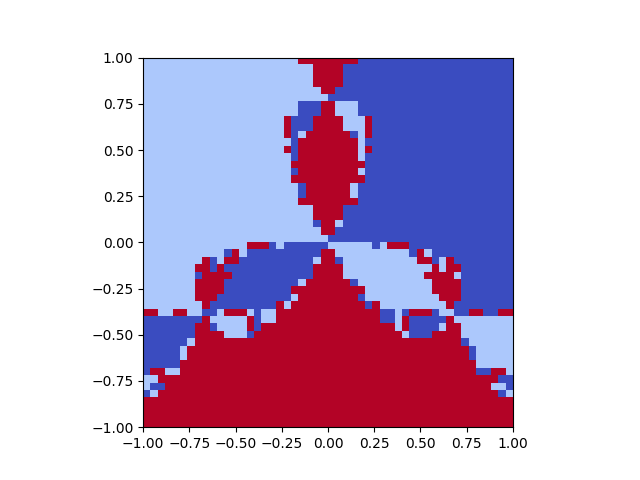

In [29]:
plt.imshow(Fractal, cmap="coolwarm" ,extent=[-1,1,-1,1])